In [16]:
import pandas as pd
from sklearn.linear_model import GammaRegressor, PoissonRegressor, LinearRegression, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

In [17]:
df = pd.read_csv('./Machine Unlearning - Trials - Retrain.csv')

In [18]:
df.head()

,LR,batch,epochs,score
0,0.001,64,1,0.04600
1,0.050,1024,6,0.03722
2,0.050,512,5,0.03400
3,0.100,64,4,0.03200
4,0.025,512,5,0.02800


In [19]:
# df['LR'] = np.log(df['LR'])
# df['batch'] = np.log2(df['batch'])

In [20]:
y = df['score']
y = np.log(y)
x = df.drop('score', axis=1)

In [21]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x = poly.fit_transform(x)

In [22]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
lasso = LassoCV(max_iter=10000, cv=3)
lasso.fit(x,y)

c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010523321534785524, tolerance: 0.006254707796804817
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013143179699188323, tolerance: 0.006254707796804817
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01224434744712255, tolerance: 0.006254707796804817
  model = cd_fast

LassoCV(cv=3, max_iter=10000)

In [24]:
lr = Lasso(alpha=lasso.alpha_) #DecisionTreeRegressor(max_features='auto')#
lr.fit(x, y)
preds = lr.predict(x)

In [25]:
# sc.transform(np.array(x.loc[0]).reshape(1, -1))

In [26]:
x_new = sc.transform(poly.transform(np.array([0.1, 1024, 6]).reshape(1, -1)))
# x_new = sc.transform(np.array([0.01, 256, 3]).reshape(1, -1))
# x_new = np.array([np.log(0.01), np.log2(256), 3]).reshape(1, -1)
np.exp(lr.predict(x_new))

c:\Users\luis.pinto1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([0.00462703])

In [27]:
multiplier = 20

df_new = pd.DataFrame()
z = np.linspace(1e-5, 1, multiplier).tolist()*3
df_new['LR'] = z
df_new['batch'] = 256
df_new['epochs'] = [3]*multiplier + [5]*multiplier + [4]*multiplier
# df_new['score'] = np.exp(lr.predict(df_new))
df_new['score'] = np.exp(lr.predict(sc.transform(poly.transform(df_new))))
# df_new['score'] = lr.predict(sc.transform(poly.transform(df_new)))
df_new.sort_values(by='score').tail(10)

,LR,batch,epochs,score
42,0.105272,256,4,0.011101
41,0.052641,256,4,0.011502
40,0.000010,256,4,0.011638
26,0.315796,256,5,0.012067
25,0.263165,256,5,0.013742
24,0.210534,256,5,0.015284
23,0.157903,256,5,0.016603
22,0.105272,256,5,0.017613
21,0.052641,256,5,0.018249
20,0.000010,256,5,0.018466


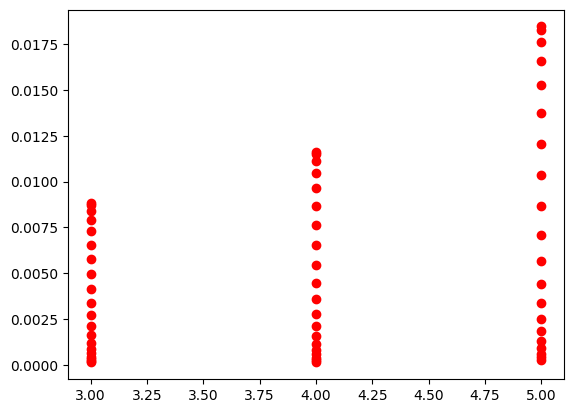

In [28]:
plt.plot(df_new['epochs'], df_new['score'], 'ro')

In [29]:
y = np.exp(y)
preds = np.exp(preds)

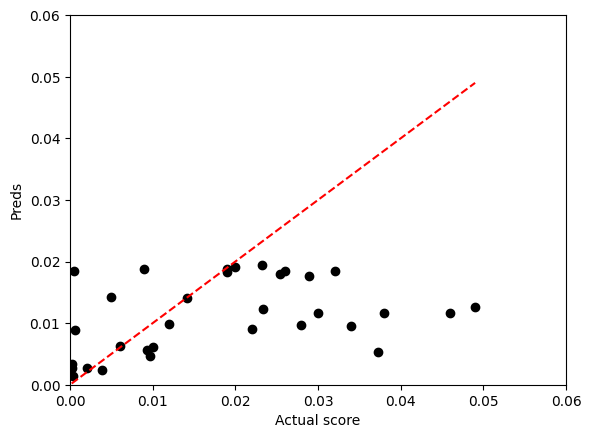

In [30]:
plt.plot(y, preds, 'ko')
plt.ylabel('Preds')
plt.xlabel('Actual score')
# Add a diagonal dotted line
min_val = min(min(y), min(preds))
max_val = max(max(y), max(preds))
plt.ylim(0,0.06)
plt.xlim(0,0.06)
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red')
plt.show()